In [1]:
import numpy as np
import matplotlib.pyplot as plt
sig = np.load('tests/testing_data/signal.npy')
sig.shape
%matplotlib inline

In [2]:
from monai.transforms import SignalResample
from monai.transforms import SignalRandShift
from monai.transforms import SignalRandScale
from monai.transforms import SignalRandDrop
from monai.transforms import SignalRandAddSine
from monai.transforms import SignalRandAddSquarePulse
from monai.transforms import SignalRandAddGaussianNoise
from monai.transforms import SignalRandAddSinePartial
from monai.transforms import SignalRandAddSquarePulsePartial
from monai.transforms import SignalStandardize
from monai.transforms import SignalNormalize
from monai.transforms import SignalZeroPad
from monai.transforms import SignalShortTimeFourier
from monai.transforms import SignalContinousWavelet
from monai.transforms import SignalRemoveFrequency
from monai.transforms import Compose

/Users/doursand/opt/anaconda3/envs/monai/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
tfs = Compose([#SignalResample(method='polynomial',current_sample_rate=500,target_sample_rate=250), #1, 2000
               #SignalRandScale(v=5,boundaries=[1,5]), #1,2000
               #SignalRandDrop(v=1,boundaries=[0,0.8]), #1, 2000
               #SignalRandAddSine(v=1,boundaries=[0,1],frequencies=[0.001,0.2]), # 1,2000
               #SignalRandAddSquarePulse(v=1,boundaries=[0,1],frequencies=[0.001,0.2]), #1,2000
               #SignalRandAddGaussianNoise(v=1,boundaries=[0,0.02]), #1,2000
               #SignalRandAddSinePartial(v=1,boundaries=[0,1],frequencies=[0.1,0.6],fraction=[0,0.4]), # 1, 2000
               #SignalRandAddSquarePulsePartial(v=1,boundaries=[0,1],frequencies=[0.1,0.6],fraction=[0,0.4]), #1, 2000
               #SignalNormalize(), #1, 2000
               #SignalStandardize(), #1, 2000
               #SignalZeroPad(targetlength=1000), #1,2000
               #SignalShortTimeFourier(frequency=500,nperseg=256,noverlap=128), #6,129,6 & 1,129,14
               #SignalContinousWavelet(type='mexh',length=150,frequency=500), #6,150,2000 & 1,150,2000
               SignalRemoveFrequency(frequency=60,quality_factor=15,sampling_freq=500)
               
               ])

In [4]:
tfs(sig).shape, tfs(sig[0,:]).shape

((6, 2000), (2000,))

In [ ]:
targetlength = 2000

if len(signal.shape) == 1:
    signal = np.expand_dims(signal, axis=0)

extended_signal = np.zeros([signal.shape[0], targetlength])
siglength = np.min([targetlength, signal.shape[1]])
extended_signal[:, :siglength] = signal[:, :siglength]
    

In [ ]:
signal.shape

In [ ]:
import cv2

In [ ]:
x = cv2.resize(tfs(sig),(300,300));x.shape

In [ ]:
plt.imshow(x[:,:,0])

In [11]:
freq = 500

In [15]:
sRate = 500
freq1 = 50
freq2 = 60
numPeriod = 10
x = np.linspace(0,numPeriod , sRate * numPeriod);x

array([0.00000000e+00, 2.00040008e-03, 4.00080016e-03, ...,
       9.99599920e+00, 9.99799960e+00, 1.00000000e+01])

In [20]:
freq1 = 250
freq2 = 60
amplitude   = np.sin(2*np.pi*freq1*x) + np.sin(2*np.pi*freq2*x)

(-15.0, 15.0)

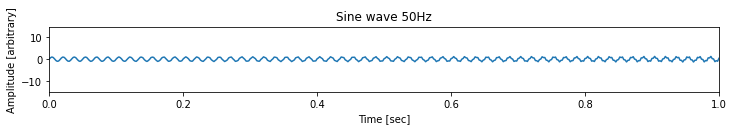

In [21]:
fig = plt.figure()
fig.set_size_inches(12,6)
plt.subplots_adjust(hspace=1)

plt.subplot(311)
plt.plot(x, amplitude)
plt.title('Sine wave 50Hz')
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude [arbitrary]')
plt.xlim(0, 1)
plt.ylim(-15, 15)

Text(0, 0.5, 'Amplitude')

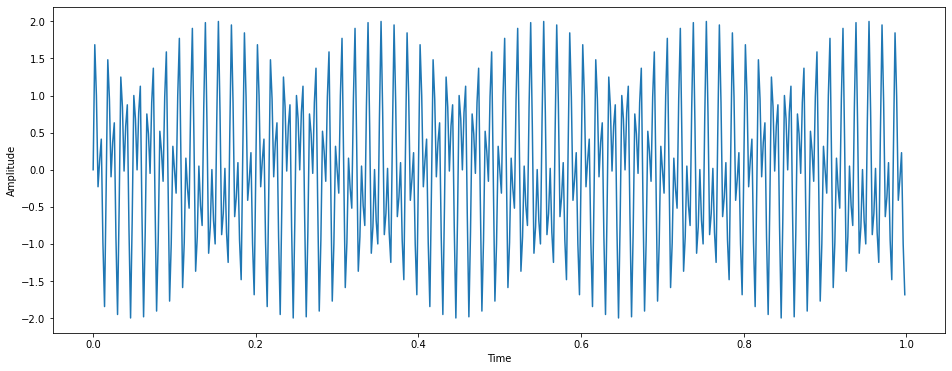

In [5]:
Fs = 500.0;  # sampling rate
Ts = 1.0/Fs; # sampling interval
t = np.arange(0,1,Ts) # time vector

ff = 125;   # frequency of the signal
y = np.sin(2*np.pi*ff*t) + np.sin(2*np.pi*60*t)

plt.figure(figsize=(16,6))
plt.plot(t, y)
plt.xlabel('Time')
plt.ylabel('Amplitude')

In [6]:
n = len(y) # length of the signal
k = np.arange(n)
T = n/Fs
frq = k/T # two sides frequency range
frq = frq[:len(frq)//2] # one side frequency range

Y = np.fft.fft(y)/n # dft and normalization
Y = Y[:n//2]

Text(0, 0.5, '|Y(freq)|')

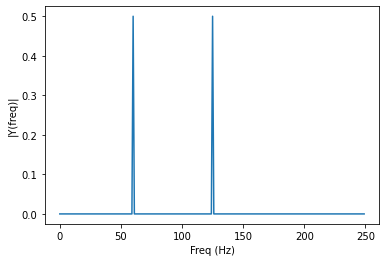

In [7]:
plt.plot(frq,abs(Y)) # plotting the spectrum
plt.xlabel('Freq (Hz)')
plt.ylabel('|Y(freq)|')

In [22]:
from scipy.signal import iirnotch,filtfilt

b_notch, a_notch = iirnotch(60, 1, Fs)
y_notched = filtfilt(b_notch, a_notch, y)

In [23]:
n = len(y_notched) # length of the signal
k = np.arange(n)
T = n/Fs
frq = k/T # two sides frequency range
frq = frq[:len(frq)//2] # one side frequency range

Y = np.fft.fft(y_notched)/n # dft and normalization
Y = Y[:n//2]

Text(0, 0.5, '|Y(freq)|')

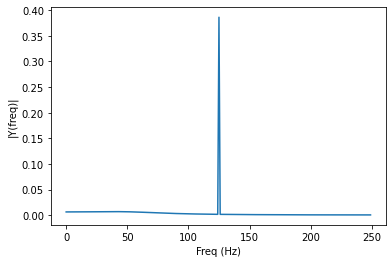

In [24]:
plt.plot(frq,abs(Y)) # plotting the spectrum
plt.xlabel('Freq (Hz)')
plt.ylabel('|Y(freq)|')

In [ ]:
from scipy.signal import iirnotch,filtfilt
quality_factor = 30
sampling_freq = 500
b_notch, a_notch = iirnotch(freq2, quality_factor, sampling_freq)
y_notched = filtfilt(b_notch, a_notch, amplitude)

In [ ]:
plt.subplot(311)
plt.plot(x, y_notched)
plt.title('Sine wave 50Hz')
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude [arbitrary]')
plt.xlim(0, 1)
plt.ylim(-15, 15)

In [ ]:
np.isnan(x.any())

In [ ]:
sig  = np.load('tests/testing_data/signal.npy')[0, :]

In [ ]:
sig.shape

In [ ]:
gaussian = SignalRandAddGaussianNoise(1.0, [0,0.02])

In [ ]:
gaussiansignal = gaussian(sig)

In [ ]:
gaussiansignal = gaussian(sig)

In [ ]:
gaussiansignal.shape

In [ ]:
len(sig)

In [ ]:
len(gaussiansignal)